## Lab Session 

### Learning Objective:
- Working with data using python libaries.
- Data Visualization.
- Exploratory data analysis and data preprocessing.
- Building a Linear regression model to predict the tip amount based on different input features.

### About the dataset (Customer Tip Data)

#### Dataset Source: https://www.kaggle.com/datasets/ranjeetjain3/seaborn-tips-dataset

The dataset contains information about the 244 orders served at a restaurant in the United States. Each observation includes the factors related to the order like total bill, time, the total number of people in a group, gender of the person paying for the order and so on.

#### Attribute Information:

- **total_bill:** Total bill (cost of the meal), including tax, in US dollars
- **tip:** Tip in US dollars
- **sex:** Sex of person paying for the meal
- **smoker:** There is a smoker in a group or not
- **day:** Day on which the order is served
- **time:** Time of the order
- **size:** Size of the group

Food servers’ tips in restaurants may be influenced by many factors, including the nature of the restaurant, size of the party, and table locations in the restaurant. Restaurant managers need to know which factors matter when they assign tables to food servers. For the sake of staff morale, they usually want to avoid either the substance or the appearance of unfair
treatment of the servers, for whom tips (at least in restaurants in the UnitedStates) are a major component of pay.

### Import required libraries

In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
%matplotlib inline
warnings.filterwarnings(action='ignore')
import sklearn
from sklearn.preprocessing import StandardScaler,LabelEncoder


### Load the dataset

In [4]:
pd.set_option("display.max_columns", None)
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
### 1. Make a list of categorical and numerical columns in the data.

In [6]:
df.info()
num_cols = df._get_numeric_data().columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


### 2. Compute the average bill amount for each day.

In [7]:
df.groupby('day')['total_bill'].mean()

day
Fri     17.151579
Sat     20.441379
Sun     21.410000
Thur    17.682742
Name: total_bill, dtype: float64

### 3. Which gender is more generous in giving tips?

In [52]:
df.groupby('sex')['tip'].var()

sex
Female    1.344428
Male      2.217424
Name: tip, dtype: float64

### 4. According to the data, were there more customers for dinner or lunch?

In [54]:
df.groupby('time')['size'].mean()

time
Dinner    2.630682
Lunch     2.411765
Name: size, dtype: float64

### 5. Based on the statistical summary, comment on the variable 'tip'

In [26]:
## tips by sex
df.groupby('sex')['tip'].mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

In [27]:
## tips by Day
df.groupby('day')['tip'].mean()

day
Fri     2.734737
Sat     2.993103
Sun     3.255132
Thur    2.771452
Name: tip, dtype: float64

In [20]:
##Comments on Tips
## By Sex , Male tipped more
## By Day, Sunday is the most tipped 

### 6. Find the busiest day in terms of the orders?

In [85]:
df.groupby('day')['size'].max()

day
Fri     4
Sat     5
Sun     6
Thur    6
Name: size, dtype: int64

In [ ]:
## busiest day is Sun and thursday

### 7. Is the variable 'total_bill' skewed? If yes, identify the type of skewness. Support your answer with a plot

In [74]:
df.skew()

total_bill    1.133213
tip           1.465451
sex          -0.602658
size          1.447882
dtype: float64

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

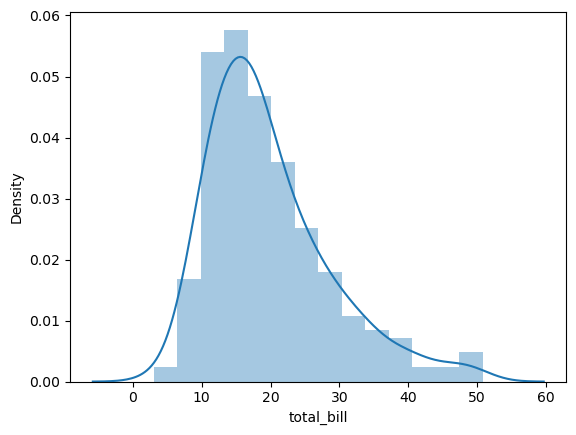

In [78]:
import seaborn as sns
sns.distplot(df['total_bill'],kde=True)

In [ ]:
sns.distplot(df['total_bill'],kde=True,rug=True,hist=False)

### 8. Is the tip amount dependent on the total bill? Visualize the relationship with a appropriate plot and metric and write your findings.

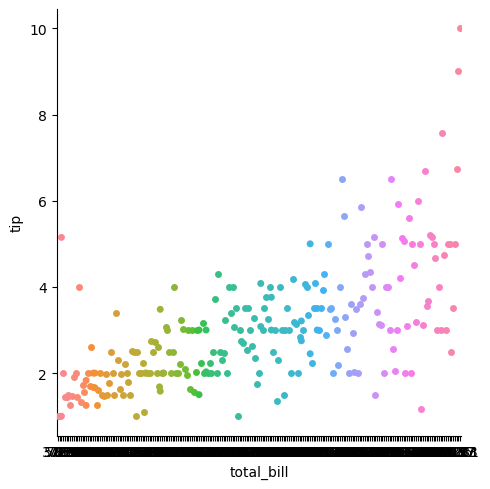

In [31]:
import seaborn as sns
tips = sns.load_dataset("tips")
sns.catplot(data=tips, kind="swarm", x="total_bill", y="tip")
import matplotlib.pyplot as plt
plt.show()

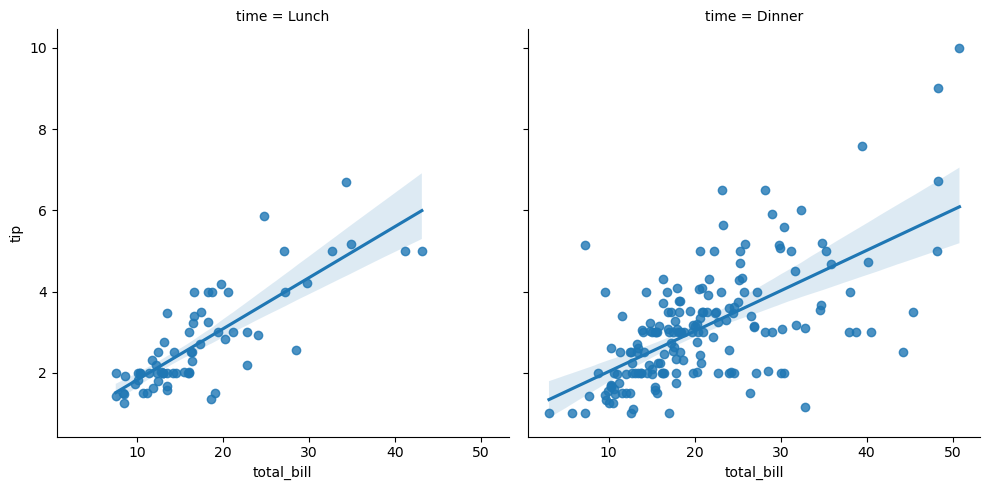

In [20]:
sns.lmplot(data=tips, x="total_bill", y="tip", col="time")
## comments
## as the total bill increased the tip also increased

### 9. What is the percentage of males and females in the dataset? and display it in the plot

In [83]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['sex']= label_encoder.fit_transform(df['sex']) 
df['sex'].unique()

array([0, 1], dtype=int64)

In [26]:
df['sex'].value_counts(normalize=True)*100

Male      64.344262
Female    35.655738
Name: sex, dtype: float64

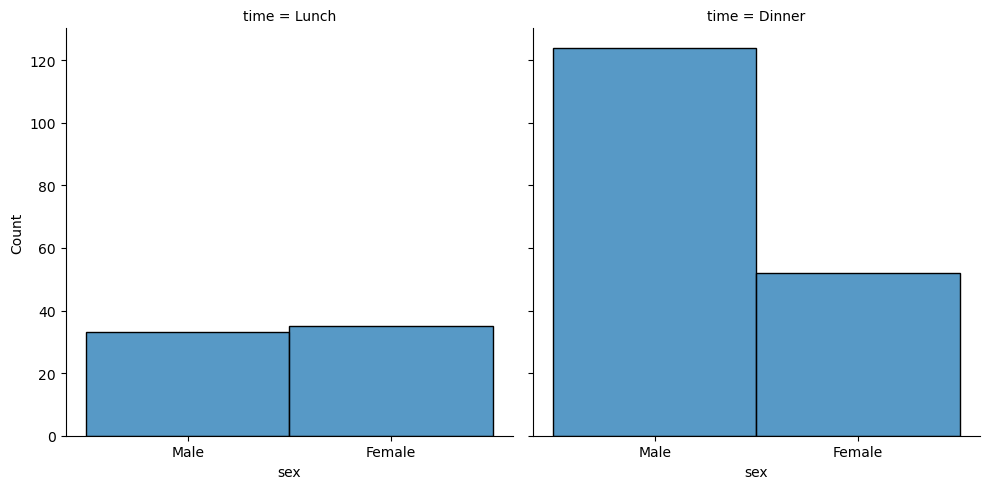

In [22]:
sns.displot(data=tips, x="sex", col="time")

### 10. Compute the gender-wise count based on smoking habits and display it in the plot

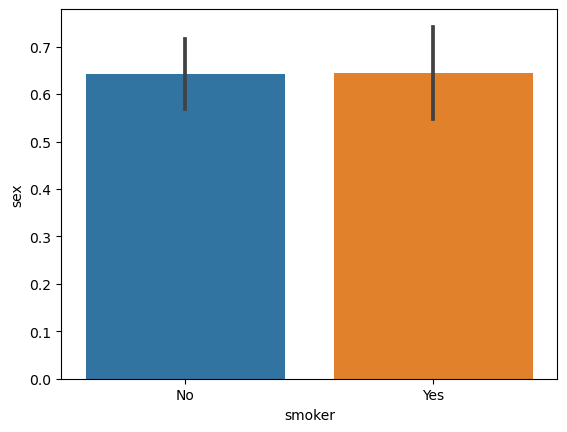

In [71]:
df['sex'].value_counts('smoker').var()
sns.barplot(df['smoker'],df['sex'])
plt.show()

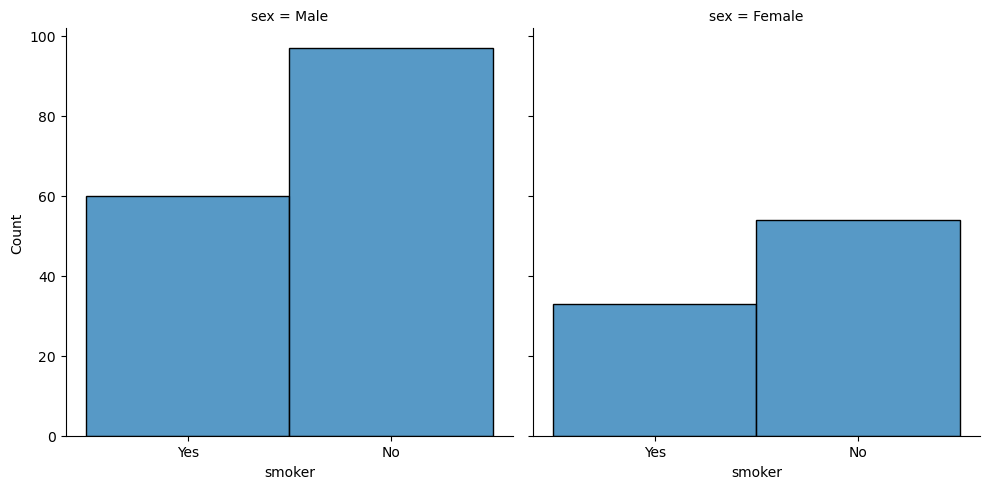

In [24]:
sns.displot(data=tips, x="smoker", col="sex")
plt.show()

### 11. Compute the average tip amount given for different days and display it in the plot.

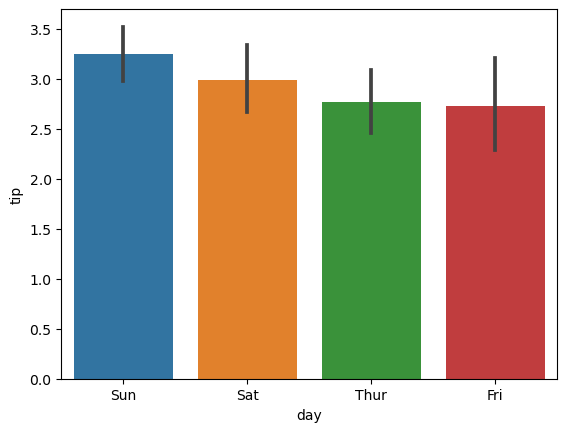

In [58]:
df.groupby('day')['tip'].mean()
sns.barplot(df['day'],df['tip'])
plt.show()

In [34]:
### 12. Is the average bill amount dependent on the size of the group? Visualize the relationship using appropriate plot and write your findings.

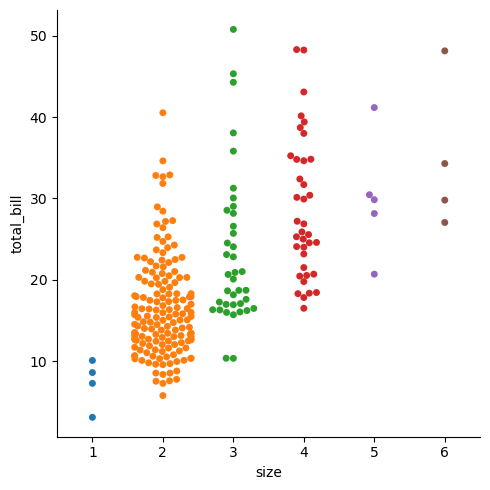

In [47]:
sns.catplot(data=tips, kind="swarm", x="size", y="total_bill", split=True)

### 13. Plot a horizontal boxplot to compare the bill amount based on gender

<AxesSubplot:xlabel='total_bill', ylabel='sex'>

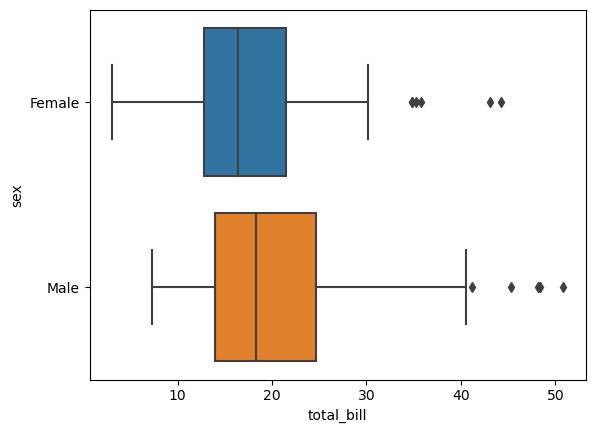

In [45]:
sns.boxplot(data=df, x="total_bill", y="sex")

### 14. Find the maximum bill amount for lunch and dinner on Saturday and Sunday

In [10]:
df.groupby('total_bill')['time'].max()

total_bill
3.07     Dinner
5.75     Dinner
7.25     Dinner
7.51      Lunch
7.56      Lunch
          ...  
45.35    Dinner
48.17    Dinner
48.27    Dinner
48.33    Dinner
50.81    Dinner
Name: time, Length: 229, dtype: object

### 15. Compute the percentage of missing values in the dataset.

In [48]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

### 16. Is there are any duplicate records in the dataset? If yes compute the count of the duplicate records and drop them.

In [49]:
#checking for duplicates
len(df[df.duplicated()])

1

In [52]:
#dropping duplicates
df.drop_duplicates(inplace=True)

In [53]:
#rechecking for duplicates
len(df[df.duplicated()])

0

### 17. Is there are any outliers present in the column 'total_bill'? If yes treat them with transformation approach, and plot a boxplot before and after the treatment

<AxesSubplot:xlabel='total_bill'>

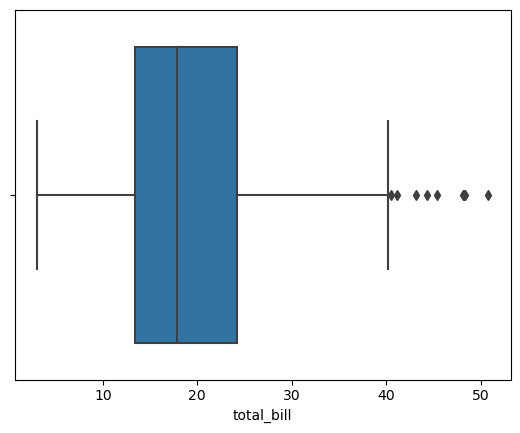

In [54]:
# Create a copy of the dataframe
df1 = df.copy()
sns.boxplot(df1['total_bill'])
#yes there are outliners in the column of Total Bill

<AxesSubplot:xlabel='total_bill', ylabel='Density'>

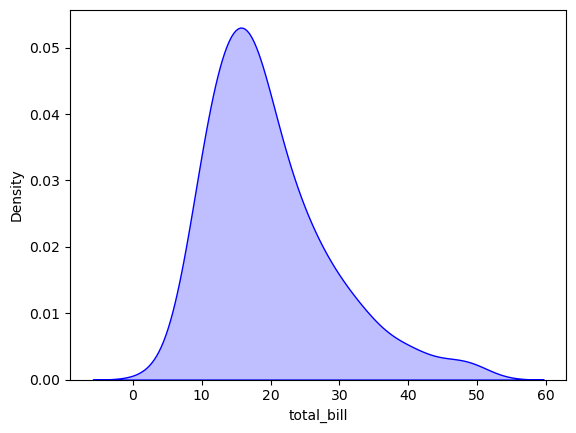

In [57]:
sns.kdeplot(df1.total_bill, color="blue", shade = True)

In [62]:
# checking samples having review less than 20
df1[df1['total_bill'] < 10].shape

(17, 7)

In [59]:
# checking samples having review less than 40
df1[df1['total_bill'] < 40].shape

(233, 7)

In [60]:
# checking samples having review less than 60
df1[df1['total_bill'] < 60].shape

(243, 7)

In [61]:
print(df1['total_bill'].max())
print(df1['total_bill'].min())

50.81
3.07


In [63]:
# Using IQR method - Treating Outliners
Q1 = df1['total_bill'].quantile(0.25)
Q3 = df1['total_bill'].quantile(0.75)
IQR = Q3-Q1
print(Q1)
print(Q3)
print(IQR)

13.379999999999999
24.174999999999997
10.794999999999998


In [64]:
lower_whisker  = Q1-(1.5*IQR)
upper_whisker  = Q3+(1.5*IQR)
print(lower_whisker)
print(upper_whisker)

-2.8124999999999964
40.36749999999999


In [65]:
df1_out = df1.loc[(df1['total_bill'] < upper_whisker) & (df1['total_bill'] > lower_whisker)]
df1_out.shape

(234, 7)

<AxesSubplot:xlabel='total_bill'>

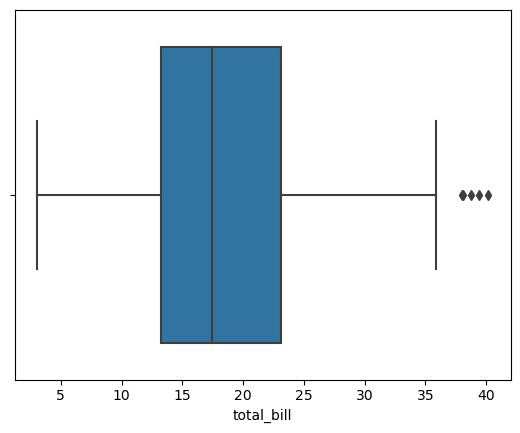

In [66]:
#Box Plot after Outliner Treatment
sns.boxplot(df1_out.total_bill)

### 18. Is there are any outliers present in the column 'tip'? If yes remove them using IQR techinque.

<AxesSubplot:xlabel='tip'>

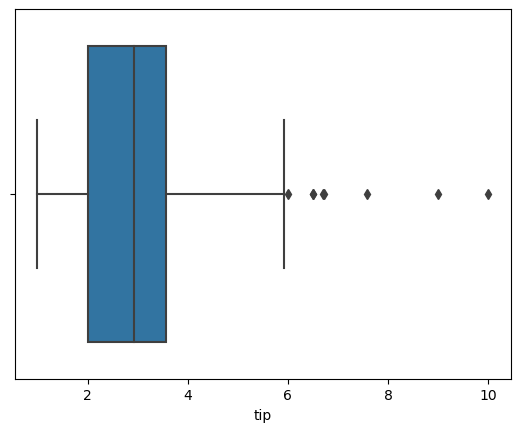

In [67]:
# Create a copy of the dataframe
df1 = df.copy()
#checking for outliners
sns.boxplot(df1['tip'])

<AxesSubplot:xlabel='tip', ylabel='Density'>

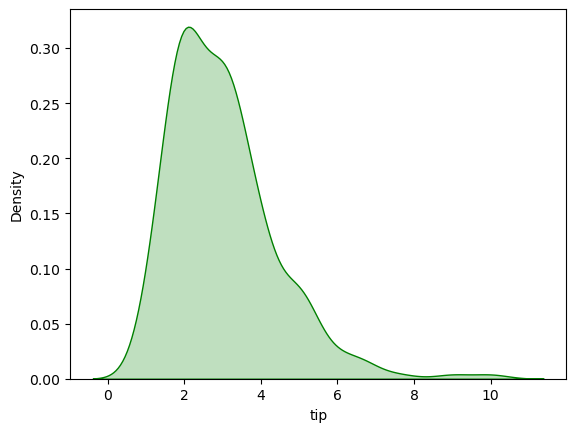

In [71]:
sns.kdeplot(df1.tip, color="green", shade = True)

In [72]:
# checking samples having review less than 2
df1[df1['tip'] < 2].shape

(45, 7)

In [73]:
# checking samples having review less than 8
df1[df1['tip'] < 8].shape

(241, 7)

In [74]:
# checking samples having review less than 10
df1[df1['tip'] < 10].shape

(242, 7)

In [75]:
print(df1['tip'].max())
print(df1['tip'].min())

10.0
1.0


In [76]:
# Using IQR method - Treating Outliners
Q1 = df1['tip'].quantile(0.25)
Q3 = df1['tip'].quantile(0.75)
IQR = Q3-Q1
print(Q1)
print(Q3)
print(IQR)

2.0
3.575
1.5750000000000002


In [77]:
lower_whisker  = Q1-(1.5*IQR)
upper_whisker  = Q3+(1.5*IQR)
print(lower_whisker)
print(upper_whisker)

-0.36250000000000027
5.9375


In [78]:
df1_out = df1.loc[(df1['tip'] < upper_whisker) & (df1['tip'] > lower_whisker)]
df1_out.shape

(235, 7)

<AxesSubplot:xlabel='tip'>

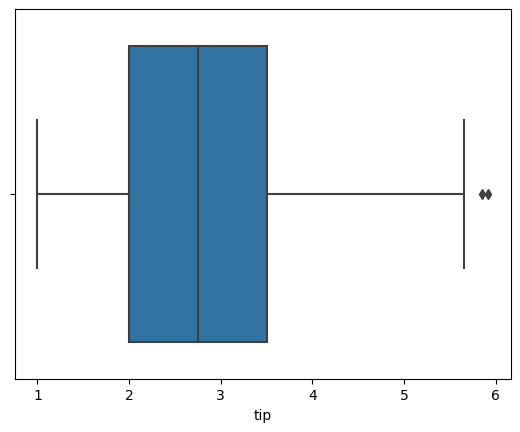

In [79]:
#Box Plot after Outliner Treatment
sns.boxplot(df1_out.tip)

### 19. Encode the categorical columns in the dataset and print the random 5 samples from the dataframe.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [29]:
df= pd.get_dummies(['sex'])
df

,sex
0,1


In [35]:
##Label encode the categorical feature 'Content Rating '
df_sex_le = pd.DataFrame(le.fit_transform(df1['sex']),columns=['sex_LE'])

df_sex_le.head()

,sex_LE
0,0


In [42]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [43]:
df1 = pd.get_dummies(df['sex'])
 
# using pd.concat to concatenate the dataframes
# df and df1 and storing the concatenated
# dataFrame in df.
df = pd.concat([df, df1], axis=1).reindex(df.index)
 
# removing the column 'sex' from df
# as it is of no use now.
df.drop('sex', axis=1, inplace=True)
 
# printing df
df

,total_bill,tip,smoker,day,time,size,Female,Male
0,16.99,1.01,No,Sun,Dinner,2,1,0
1,10.34,1.66,No,Sun,Dinner,3,0,1
2,21.01,3.50,No,Sun,Dinner,3,0,1
3,23.68,3.31,No,Sun,Dinner,2,0,1
4,24.59,3.61,No,Sun,Dinner,4,1,0
...,...,...,...,...,...,...,...,...
239,29.03,5.92,No,Sat,Dinner,3,0,1
240,27.18,2.00,Yes,Sat,Dinner,2,1,0
241,22.67,2.00,Yes,Sat,Dinner,2,0,1
242,17.82,1.75,No,Sat,Dinner,2,0,1


In [44]:
df1 = pd.get_dummies(df['day'])
 
# using pd.concat to concatenate the dataframes
# df and df1 and storing the concatenated
# dataFrame in df.
df = pd.concat([df, df1], axis=1).reindex(df.index)
 
# removing the column 'day' from df
# as it is of no use now.
df.drop('day', axis=1, inplace=True)
 
# printing df
df

,total_bill,tip,smoker,time,size,Female,Male,Fri,Sat,Sun,Thur
0,16.99,1.01,No,Dinner,2,1,0,0,0,1,0
1,10.34,1.66,No,Dinner,3,0,1,0,0,1,0
2,21.01,3.50,No,Dinner,3,0,1,0,0,1,0
3,23.68,3.31,No,Dinner,2,0,1,0,0,1,0
4,24.59,3.61,No,Dinner,4,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,No,Dinner,3,0,1,0,1,0,0
240,27.18,2.00,Yes,Dinner,2,1,0,0,1,0,0
241,22.67,2.00,Yes,Dinner,2,0,1,0,1,0,0
242,17.82,1.75,No,Dinner,2,0,1,0,1,0,0


In [45]:
df1 = pd.get_dummies(df['time'])
 
# using pd.concat to concatenate the dataframes
# df and df1 and storing the concatenated
# dataFrame in df.
df = pd.concat([df, df1], axis=1).reindex(df.index)
 
# removing the column 'time' from df
# as it is of no use now.
df.drop('time', axis=1, inplace=True)
 
# printing df
df

,total_bill,tip,smoker,size,Female,Male,Fri,Sat,Sun,Thur,Dinner,Lunch
0,16.99,1.01,No,2,1,0,0,0,1,0,1,0
1,10.34,1.66,No,3,0,1,0,0,1,0,1,0
2,21.01,3.50,No,3,0,1,0,0,1,0,1,0
3,23.68,3.31,No,2,0,1,0,0,1,0,1,0
4,24.59,3.61,No,4,1,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,No,3,0,1,0,1,0,0,1,0
240,27.18,2.00,Yes,2,1,0,0,1,0,0,1,0
241,22.67,2.00,Yes,2,0,1,0,1,0,0,1,0
242,17.82,1.75,No,2,0,1,0,1,0,0,1,0


In [46]:
df1 = pd.get_dummies(df['smoker'])
 
# using pd.concat to concatenate the dataframes
# df and df1 and storing the concatenated
# dataFrame in df.
df = pd.concat([df, df1], axis=1).reindex(df.index)
 
# removing the column 'smoker' from df
# as it is of no use now.
df.drop('smoker', axis=1, inplace=True)
 
# printing df
df

,total_bill,tip,size,Female,Male,Fri,Sat,Sun,Thur,Dinner,Lunch,No,Yes
0,16.99,1.01,2,1,0,0,0,1,0,1,0,1,0
1,10.34,1.66,3,0,1,0,0,1,0,1,0,1,0
2,21.01,3.50,3,0,1,0,0,1,0,1,0,1,0
3,23.68,3.31,2,0,1,0,0,1,0,1,0,1,0
4,24.59,3.61,4,1,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,0,1,0,1,0,0,1,0,1,0
240,27.18,2.00,2,1,0,0,1,0,0,1,0,0,1
241,22.67,2.00,2,0,1,0,1,0,0,1,0,0,1
242,17.82,1.75,2,0,1,0,1,0,0,1,0,1,0


In [48]:
## all the categorical data are converted to numerical data types
## Now, printing random data frames 

### 20. Check the range of the column 'total_bill' and transform the values such that the range will be 1.

In [32]:
pd.set_option("display.max_columns", None)
df = pd.read_csv('tips.csv')
df.head()
## create a copy of the dataframe
df1 = df.copy()
df_final = pd.get_dummies(df1, columns= ['total_bill'], drop_first = True)
df_final.head()

,tip,sex,smoker,day,time,size,total_bill_5.75,total_bill_7.25,total_bill_7.51,total_bill_7.56,total_bill_7.74,total_bill_8.35,total_bill_8.51,total_bill_8.52,total_bill_8.58,total_bill_8.77,total_bill_9.55,total_bill_9.6,total_bill_9.68,total_bill_9.78,total_bill_9.94,total_bill_10.07,total_bill_10.09,total_bill_10.27,total_bill_10.29,total_bill_10.33,total_bill_10.34,total_bill_10.51,total_bill_10.59,total_bill_10.63,total_bill_10.65,total_bill_10.77,total_bill_11.02,total_bill_11.17,total_bill_11.24,total_bill_11.35,total_bill_11.38,total_bill_11.59,total_bill_11.61,total_bill_11.69,total_bill_11.87,total_bill_12.02,total_bill_12.03,total_bill_12.16,total_bill_12.26,total_bill_12.43,total_bill_12.46,total_bill_12.48,total_bill_12.54,total_bill_12.6,total_bill_12.66,total_bill_12.69,total_bill_12.74,total_bill_12.76,total_bill_12.9,total_bill_13.0,total_bill_13.03,total_bill_13.13,total_bill_13.16,total_bill_13.27,total_bill_13.28,total_bill_13.37,total_bill_13.39,total_bill_13.42,total_bill_13.51,total_bill_13.81,total_bill_13.94,total_bill_14.0,total_bill_14.07,total_bill_14.15,total_bill_14.26,total_bill_14.31,total_bill_14.48,total_bill_14.52,total_bill_14.73,total_bill_14.78,total_bill_14.83,total_bill_15.01,total_bill_15.04,total_bill_15.06,total_bill_15.36,total_bill_15.38,total_bill_15.42,total_bill_15.48,total_bill_15.53,total_bill_15.69,total_bill_15.77,total_bill_15.81,total_bill_15.95,total_bill_15.98,total_bill_16.0,total_bill_16.04,total_bill_16.21,total_bill_16.27,total_bill_16.29,total_bill_16.31,total_bill_16.32,total_bill_16.4,total_bill_16.43,total_bill_16.45,total_bill_16.47,total_bill_16.49,total_bill_16.58,total_bill_16.66,total_bill_16.82,total_bill_16.93,total_bill_16.97,total_bill_16.99,total_bill_17.07,total_bill_17.26,total_bill_17.29,total_bill_17.31,total_bill_17.46,total_bill_17.47,total_bill_17.51,total_bill_17.59,total_bill_17.78,total_bill_17.81,total_bill_17.82,total_bill_17.89,total_bill_17.92,total_bill_18.04,total_bill_18.15,total_bill_18.24,total_bill_18.26,total_bill_18.28,total_bill_18.29,total_bill_18.35,total_bill_18.43,total_bill_18.64,total_bill_18.69,total_bill_18.71,total_bill_18.78,total_bill_19.08,total_bill_19.44,total_bill_19.49,total_bill_19.65,total_bill_19.77,total_bill_19.81,total_bill_19.82,total_bill_20.08,total_bill_20.23,total_bill_20.27,total_bill_20.29,total_bill_20.45,total_bill_20.49,total_bill_20.53,total_bill_20.65,total_bill_20.69,total_bill_20.76,total_bill_20.9,total_bill_20.92,total_bill_21.01,total_bill_21.16,total_bill_21.5,total_bill_21.58,total_bill_21.7,total_bill_22.12,total_bill_22.23,total_bill_22.42,total_bill_22.49,total_bill_22.67,total_bill_22.75,total_bill_22.76,total_bill_22.82,total_bill_23.1,total_bill_23.17,total_bill_23.33,total_bill_23.68,total_bill_23.95,total_bill_24.01,total_bill_24.06,total_bill_24.08,total_bill_24.27,total_bill_24.52,total_bill_24.55,total_bill_24.59,total_bill_24.71,total_bill_25.0,total_bill_25.21,total_bill_25.28,total_bill_25.29,total_bill_25.56,total_bill_25.71,total_bill_25.89,total_bill_26.41,total_bill_26.59,total_bill_26.86,total_bill_26.88,total_bill_27.05,total_bill_27.18,total_bill_27.2,total_bill_27.28,total_bill_28.15,total_bill_28.17,total_bill_28.44,total_bill_28.55,total_bill_28.97,total_bill_29.03,total_bill_29.8,total_bill_29.85,total_bill_29.93,total_bill_30.06,total_bill_30.14,total_bill_30.4,total_bill_30.46,total_bill_31.27,total_bill_31.71,total_bill_31.85,total_bill_32.4,total_bill_32.68,total_bill_32.83,total_bill_32.9,total_bill_34.3,total_bill_34.63,total_bill_34.65,total_bill_34.81,total_bill_34.83,total_bill_35.26,total_bill_35.83,total_bill_38.01,total_bill_38.07,total_bill_38.73,total_bill_39.42,total_bill_40.17,total_bill_40.55,total_bill_41.19,total_bill_43.11,total_bill_44.3,total_bill_45.35,total_bill_48.17,total_bill_48.27,total_bill_48.33,total_bill_50.81
0,1.01,Female,No,Sun,Dinner,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [27]:
# Scale the numerical features ratings and reviews using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
dff_final = df_final.drop(['sex','smoker','time','day','tip','size'], axis = 1)
dff_final.head()

,total_bill_5.75,total_bill_7.25,total_bill_7.51,total_bill_7.56,total_bill_7.74,total_bill_8.35,total_bill_8.51,total_bill_8.52,total_bill_8.58,total_bill_8.77,total_bill_9.55,total_bill_9.6,total_bill_9.68,total_bill_9.78,total_bill_9.94,total_bill_10.07,total_bill_10.09,total_bill_10.27,total_bill_10.29,total_bill_10.33,total_bill_10.34,total_bill_10.51,total_bill_10.59,total_bill_10.63,total_bill_10.65,total_bill_10.77,total_bill_11.02,total_bill_11.17,total_bill_11.24,total_bill_11.35,total_bill_11.38,total_bill_11.59,total_bill_11.61,total_bill_11.69,total_bill_11.87,total_bill_12.02,total_bill_12.03,total_bill_12.16,total_bill_12.26,total_bill_12.43,total_bill_12.46,total_bill_12.48,total_bill_12.54,total_bill_12.6,total_bill_12.66,total_bill_12.69,total_bill_12.74,total_bill_12.76,total_bill_12.9,total_bill_13.0,total_bill_13.03,total_bill_13.13,total_bill_13.16,total_bill_13.27,total_bill_13.28,total_bill_13.37,total_bill_13.39,total_bill_13.42,total_bill_13.51,total_bill_13.81,total_bill_13.94,total_bill_14.0,total_bill_14.07,total_bill_14.15,total_bill_14.26,total_bill_14.31,total_bill_14.48,total_bill_14.52,total_bill_14.73,total_bill_14.78,total_bill_14.83,total_bill_15.01,total_bill_15.04,total_bill_15.06,total_bill_15.36,total_bill_15.38,total_bill_15.42,total_bill_15.48,total_bill_15.53,total_bill_15.69,total_bill_15.77,total_bill_15.81,total_bill_15.95,total_bill_15.98,total_bill_16.0,total_bill_16.04,total_bill_16.21,total_bill_16.27,total_bill_16.29,total_bill_16.31,total_bill_16.32,total_bill_16.4,total_bill_16.43,total_bill_16.45,total_bill_16.47,total_bill_16.49,total_bill_16.58,total_bill_16.66,total_bill_16.82,total_bill_16.93,total_bill_16.97,total_bill_16.99,total_bill_17.07,total_bill_17.26,total_bill_17.29,total_bill_17.31,total_bill_17.46,total_bill_17.47,total_bill_17.51,total_bill_17.59,total_bill_17.78,total_bill_17.81,total_bill_17.82,total_bill_17.89,total_bill_17.92,total_bill_18.04,total_bill_18.15,total_bill_18.24,total_bill_18.26,total_bill_18.28,total_bill_18.29,total_bill_18.35,total_bill_18.43,total_bill_18.64,total_bill_18.69,total_bill_18.71,total_bill_18.78,total_bill_19.08,total_bill_19.44,total_bill_19.49,total_bill_19.65,total_bill_19.77,total_bill_19.81,total_bill_19.82,total_bill_20.08,total_bill_20.23,total_bill_20.27,total_bill_20.29,total_bill_20.45,total_bill_20.49,total_bill_20.53,total_bill_20.65,total_bill_20.69,total_bill_20.76,total_bill_20.9,total_bill_20.92,total_bill_21.01,total_bill_21.16,total_bill_21.5,total_bill_21.58,total_bill_21.7,total_bill_22.12,total_bill_22.23,total_bill_22.42,total_bill_22.49,total_bill_22.67,total_bill_22.75,total_bill_22.76,total_bill_22.82,total_bill_23.1,total_bill_23.17,total_bill_23.33,total_bill_23.68,total_bill_23.95,total_bill_24.01,total_bill_24.06,total_bill_24.08,total_bill_24.27,total_bill_24.52,total_bill_24.55,total_bill_24.59,total_bill_24.71,total_bill_25.0,total_bill_25.21,total_bill_25.28,total_bill_25.29,total_bill_25.56,total_bill_25.71,total_bill_25.89,total_bill_26.41,total_bill_26.59,total_bill_26.86,total_bill_26.88,total_bill_27.05,total_bill_27.18,total_bill_27.2,total_bill_27.28,total_bill_28.15,total_bill_28.17,total_bill_28.44,total_bill_28.55,total_bill_28.97,total_bill_29.03,total_bill_29.8,total_bill_29.85,total_bill_29.93,total_bill_30.06,total_bill_30.14,total_bill_30.4,total_bill_30.46,total_bill_31.27,total_bill_31.71,total_bill_31.85,total_bill_32.4,total_bill_32.68,total_bill_32.83,total_bill_32.9,total_bill_34.3,total_bill_34.63,total_bill_34.65,total_bill_34.81,total_bill_34.83,total_bill_35.26,total_bill_35.83,total_bill_38.01,total_bill_38.07,total_bill_38.73,total_bill_39.42,total_bill_40.17,total_bill_40.55,total_bill_41.19,total_bill_43.11,total_bill_44.3,total_bill_45.35,total_bill_48.17,total_bill_48.27,total_bill_48.33,total_bill_50.81
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [28]:

# create an  object for MinMax scaling to range 1
min_max = MinMaxScaler()

df_scaled1 = dff_final.copy()

df_scaled1.iloc[:] = min_max.fit_transform(df_scaled1.iloc[:])
df_scaled1.head()

,total_bill_5.75,total_bill_7.25,total_bill_7.51,total_bill_7.56,total_bill_7.74,total_bill_8.35,total_bill_8.51,total_bill_8.52,total_bill_8.58,total_bill_8.77,total_bill_9.55,total_bill_9.6,total_bill_9.68,total_bill_9.78,total_bill_9.94,total_bill_10.07,total_bill_10.09,total_bill_10.27,total_bill_10.29,total_bill_10.33,total_bill_10.34,total_bill_10.51,total_bill_10.59,total_bill_10.63,total_bill_10.65,total_bill_10.77,total_bill_11.02,total_bill_11.17,total_bill_11.24,total_bill_11.35,total_bill_11.38,total_bill_11.59,total_bill_11.61,total_bill_11.69,total_bill_11.87,total_bill_12.02,total_bill_12.03,total_bill_12.16,total_bill_12.26,total_bill_12.43,total_bill_12.46,total_bill_12.48,total_bill_12.54,total_bill_12.6,total_bill_12.66,total_bill_12.69,total_bill_12.74,total_bill_12.76,total_bill_12.9,total_bill_13.0,total_bill_13.03,total_bill_13.13,total_bill_13.16,total_bill_13.27,total_bill_13.28,total_bill_13.37,total_bill_13.39,total_bill_13.42,total_bill_13.51,total_bill_13.81,total_bill_13.94,total_bill_14.0,total_bill_14.07,total_bill_14.15,total_bill_14.26,total_bill_14.31,total_bill_14.48,total_bill_14.52,total_bill_14.73,total_bill_14.78,total_bill_14.83,total_bill_15.01,total_bill_15.04,total_bill_15.06,total_bill_15.36,total_bill_15.38,total_bill_15.42,total_bill_15.48,total_bill_15.53,total_bill_15.69,total_bill_15.77,total_bill_15.81,total_bill_15.95,total_bill_15.98,total_bill_16.0,total_bill_16.04,total_bill_16.21,total_bill_16.27,total_bill_16.29,total_bill_16.31,total_bill_16.32,total_bill_16.4,total_bill_16.43,total_bill_16.45,total_bill_16.47,total_bill_16.49,total_bill_16.58,total_bill_16.66,total_bill_16.82,total_bill_16.93,total_bill_16.97,total_bill_16.99,total_bill_17.07,total_bill_17.26,total_bill_17.29,total_bill_17.31,total_bill_17.46,total_bill_17.47,total_bill_17.51,total_bill_17.59,total_bill_17.78,total_bill_17.81,total_bill_17.82,total_bill_17.89,total_bill_17.92,total_bill_18.04,total_bill_18.15,total_bill_18.24,total_bill_18.26,total_bill_18.28,total_bill_18.29,total_bill_18.35,total_bill_18.43,total_bill_18.64,total_bill_18.69,total_bill_18.71,total_bill_18.78,total_bill_19.08,total_bill_19.44,total_bill_19.49,total_bill_19.65,total_bill_19.77,total_bill_19.81,total_bill_19.82,total_bill_20.08,total_bill_20.23,total_bill_20.27,total_bill_20.29,total_bill_20.45,total_bill_20.49,total_bill_20.53,total_bill_20.65,total_bill_20.69,total_bill_20.76,total_bill_20.9,total_bill_20.92,total_bill_21.01,total_bill_21.16,total_bill_21.5,total_bill_21.58,total_bill_21.7,total_bill_22.12,total_bill_22.23,total_bill_22.42,total_bill_22.49,total_bill_22.67,total_bill_22.75,total_bill_22.76,total_bill_22.82,total_bill_23.1,total_bill_23.17,total_bill_23.33,total_bill_23.68,total_bill_23.95,total_bill_24.01,total_bill_24.06,total_bill_24.08,total_bill_24.27,total_bill_24.52,total_bill_24.55,total_bill_24.59,total_bill_24.71,total_bill_25.0,total_bill_25.21,total_bill_25.28,total_bill_25.29,total_bill_25.56,total_bill_25.71,total_bill_25.89,total_bill_26.41,total_bill_26.59,total_bill_26.86,total_bill_26.88,total_bill_27.05,total_bill_27.18,total_bill_27.2,total_bill_27.28,total_bill_28.15,total_bill_28.17,total_bill_28.44,total_bill_28.55,total_bill_28.97,total_bill_29.03,total_bill_29.8,total_bill_29.85,total_bill_29.93,total_bill_30.06,total_bill_30.14,total_bill_30.4,total_bill_30.46,total_bill_31.27,total_bill_31.71,total_bill_31.85,total_bill_32.4,total_bill_32.68,total_bill_32.83,total_bill_32.9,total_bill_34.3,total_bill_34.63,total_bill_34.65,total_bill_34.81,total_bill_34.83,total_bill_35.26,total_bill_35.83,total_bill_38.01,total_bill_38.07,total_bill_38.73,total_bill_39.42,total_bill_40.17,total_bill_40.55,total_bill_41.19,total_bill_43.11,total_bill_44.3,total_bill_45.35,total_bill_48.17,total_bill_48.27,total_bill_48.33,total_bill_50.81
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

### 21. Load the dataset again by giving the name of the dataframe as "tips_df"
- i) Encode the categorical variables.
- ii) Store the target column (i.e.tip) in the y variable and the rest of the columns in the X variable

### 22. Split the dataset into two parts (i.e. 70% train and 30% test), and Standardize the columns "total_bill" and "Size" using the mim_max scaling approach

### 23. Train a linear regression model using the training data and print the r_squared value of the prediction on the test data.